In [90]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [91]:
data = np.array([
    -0.011, 0.933, 0.874, 0.871, 0.931, 0.833, 1.911, 1.533, 1.011, -0.022,
     1.211, 1.333, 1.398, 1.483, 1.231, 1.293, 1.392, 1.301, -0.091, 1.481,
     1.611, 1.693, 1.491, 1.300, 1.222, 1.520, 1.109, 1.518, 1.116, 1.501,
     0.993, 1.519, -0.101, 1.815, 1.617, 1.453, 1.120, 1.488, 1.319, 1.491,
     1.217, 1.492, 1.018, 1.913
])

In [92]:
# Размер
n = data.size
print(n)

44


In [93]:
# Сортировка
data.sort()
print(data)

[-0.101 -0.091 -0.022 -0.011  0.833  0.871  0.874  0.931  0.933  0.993
  1.011  1.018  1.109  1.116  1.12   1.211  1.217  1.222  1.231  1.293
  1.3    1.301  1.319  1.333  1.392  1.398  1.453  1.481  1.483  1.488
  1.491  1.491  1.492  1.501  1.518  1.519  1.52   1.533  1.611  1.617
  1.693  1.815  1.911  1.913]


In [94]:
# Минимум, максимум
x_min =  data.min()
x_max =  data.max()
print(f"min = {x_min}")
print(f"max = {x_max}")

min = -0.101
max = 1.913


In [95]:
# Находим размер интервала
k = int(1 + 3.322 * np.log10(n))
# При k = 4 гипотеза подтверждается
print(f"k = {k}")

k = 6


In [96]:
# Находим ширину интервала
h = (x_max - x_min) / k
print(f"h = {h}")

h = 0.3356666666666667


In [97]:
# Границы интервалов
left = [x_min + i * h for i in range(k)]
right = [x_min + (i + 1) * h for i in range(k)]

In [98]:
df = pd.DataFrame({"Левая граница": left, "Правая граница": right})
df

,Левая граница,Правая граница
0,-0.101000,0.234667
1,0.234667,0.570333
2,0.570333,0.906000
3,0.906000,1.241667
4,1.241667,1.577333
5,1.577333,1.913000


In [99]:
def findIdx(val, right, h):
    return int(np.ceil((val - right) / h))

def getFrequency(data, right, k, h):
    i = 0
    frequency = [0] * k
    for val in data:
        if val >= right[i]:
            i += findIdx(val, right[i], h)
        frequency[i] += 1
    return frequency

# Нахождение частот
frequency = getFrequency(data, right, k, h)
df["Частоты"] = frequency
df

,Левая граница,Правая граница,Частоты
0,-0.101000,0.234667,4
1,0.234667,0.570333,0
2,0.570333,0.906000,3
3,0.906000,1.241667,12
4,1.241667,1.577333,19
5,1.577333,1.913000,6


In [100]:
def getRelativeFrequency(frequency, n):
    return [val / n for val in frequency]

# Нахождение относительных частот
relative_frequency = getRelativeFrequency(frequency, n)
df["Относительные частоты"] = relative_frequency
df

,Левая граница,Правая граница,Частоты,Относительные частоты
0,-0.101000,0.234667,4,0.090909
1,0.234667,0.570333,0,0.000000
2,0.570333,0.906000,3,0.068182
3,0.906000,1.241667,12,0.272727
4,1.241667,1.577333,19,0.431818
5,1.577333,1.913000,6,0.136364


In [101]:
def getMiddleValue(left, right):
    return [(l + r) / 2 for l, r in zip(left, right)]

# Средние значения
middle = getMiddleValue(left, right)
df["Среднее значение"] = middle
df

,Левая граница,Правая граница,Частоты,Относительные частоты,Среднее значение
0,-0.101000,0.234667,4,0.090909,0.066833
1,0.234667,0.570333,0,0.000000,0.402500
2,0.570333,0.906000,3,0.068182,0.738167
3,0.906000,1.241667,12,0.272727,1.073833
4,1.241667,1.577333,19,0.431818,1.409500
5,1.577333,1.913000,6,0.136364,1.745167


In [102]:
def getExpectedValue(data, frequency, n):
    return np.sum([val * freq for val, freq in zip(data, frequency)]) / n

# Мат. ожидание
expected_value = getExpectedValue(middle, frequency, n)
print(f"Expected value = {expected_value}")

Expected value = 1.1958939393939396


In [103]:
def getDispersion(data, frequency, expected_value, n):
    return np.sum([freq * (val - expected_value) ** 2 for val, freq in zip(data, frequency)]) / n

dispersion = getDispersion(middle, frequency, expected_value, n)
corrected_dispersion = n / (n - 1) * dispersion
std_deviation = np.sqrt(corrected_dispersion)
print(f"Dispersion = {dispersion}")
print(f"Corrected dispersion = {corrected_dispersion}")
print(f"Deviation = {std_deviation}")

Dispersion = 0.19508105188246108
Corrected dispersion = 0.19961782053089042
Deviation = 0.44678610154176734


In [76]:
def getDensity(frequency, h):
    return [val / h for val in frequency]

density = getDensity(frequency, h)
df["Плотность"] = density
df

,Левая граница,Правая граница,Частоты,Относительные частоты,Среднее значение,Плотность
0,-0.101000,0.234667,4,0.090909,0.066833,11.916584
1,0.234667,0.570333,0,0.000000,0.402500,0.000000
2,0.570333,0.906000,3,0.068182,0.738167,8.937438
3,0.906000,1.241667,12,0.272727,1.073833,35.749752
4,1.241667,1.577333,19,0.431818,1.409500,56.603774
5,1.577333,1.913000,6,0.136364,1.745167,17.874876


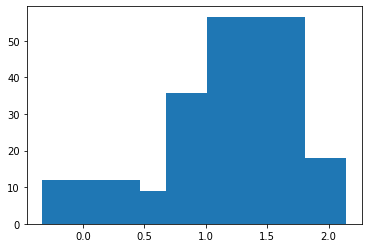

In [77]:
plt.bar(df["Среднее значение"], df["Плотность"])
plt.show()

In [78]:
# Получаем булевский столбец
condition = df["Частоты"] > 5

df = df.groupby(condition.cumsum(), as_index=False).agg({
    "Левая граница": min, "Правая граница": max,
    "Частоты": sum, "Относительные частоты": sum, 
    "Среднее значение": np.mean, "Плотность": sum
})
df

,Левая граница,Правая граница,Частоты,Относительные частоты,Среднее значение,Плотность
0,-0.101000,0.906000,7,0.159091,0.402500,20.854022
1,0.906000,1.241667,12,0.272727,1.073833,35.749752
2,1.241667,1.577333,19,0.431818,1.409500,56.603774
3,1.577333,1.913000,6,0.136364,1.745167,17.874876


In [79]:
def getNormalizedData(data, expected_value, std_eviation):
    return [(val - expected_value) / std_eviation for val in data]

df["x_left"] = getNormalizedData(df["Левая граница"], expected_value, std_deviation)
df["x_right"] = getNormalizedData(df["Правая граница"], expected_value, std_deviation)
df

,Левая граница,Правая граница,Частоты,Относительные частоты,Среднее значение,Плотность,x_left,x_right
0,-0.101000,0.906000,7,0.159091,0.402500,20.854022,-2.902718,-0.648843
1,0.906000,1.241667,12,0.272727,1.073833,35.749752,-0.648843,0.102449
2,1.241667,1.577333,19,0.431818,1.409500,56.603774,0.102449,0.853741
3,1.577333,1.913000,6,0.136364,1.745167,17.874876,0.853741,1.605032


In [80]:
def getLaplaceValues(data):
    return [norm.cdf(val) - 0.5 for val in data]

df["Ф_left"] = getLaplaceValues(df["x_left"])
df["Ф_right"] = getLaplaceValues(df["x_right"])
df["p_i"] = df["Ф_right"] - df["Ф_left"]
df["np_i"] = df["p_i"] * n
df["n_i - np_i"] = df["Частоты"] - df["np_i"]
df["(n_i - np_i) ^ 2 / (np_i)"] = df["n_i - np_i"] ** 2 / df["np_i"]

df

,Левая граница,Правая граница,Частоты,Относительные частоты,Среднее значение,Плотность,x_left,x_right,Ф_left,Ф_right,p_i,np_i,n_i - np_i,(n_i - np_i) ^ 2 / (np_i)
0,-0.101000,0.906000,7,0.159091,0.402500,20.854022,-2.902718,-0.648843,-0.498150,-0.241780,0.256370,11.280293,-4.280293,1.624152
1,0.906000,1.241667,12,0.272727,1.073833,35.749752,-0.648843,0.102449,-0.241780,0.040800,0.282580,12.433511,-0.433511,0.015115
2,1.241667,1.577333,19,0.431818,1.409500,56.603774,0.102449,0.853741,0.040800,0.303376,0.262576,11.553336,7.446664,4.799723
3,1.577333,1.913000,6,0.136364,1.745167,17.874876,0.853741,1.605032,0.303376,0.445757,0.142381,6.264765,-0.264765,0.011190


In [81]:
expected_result = 3.8
print("Result: {}".format(sum(df["(n_i - np_i) ^ 2 / (np_i)"])))
print(f"Expected: {expected_result}")

Result: 6.450179516838077
Expected: 3.8


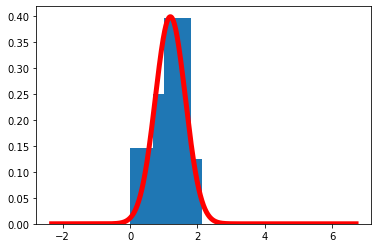

In [82]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99999999999), 1000)
y = (x - expected_value) / std_deviation
ax.bar(df["Среднее значение"], df["Плотность"]*0.007)
ax.plot(x, norm.pdf(y), "r", lw = 5)
plt.show()

In [83]:
alpha = 0.05
beta = 1 - alpha

In [84]:
t = 0.475
sigma = t * np.sqrt(dispersion / n)
print(sigma)

0.03162822471197791


In [85]:
print(f"{expected_value - sigma} < a < {expected_value + sigma}")

1.1642657146819617 < a < 1.2275221641059175


In [86]:
q = 0.22
print(f"{std_deviation * (1 - q)} < d < {std_deviation * (1 + q)}")

0.34849315920257856 < d < 0.5450790438809562
